In [87]:
import pandas as pd

In [88]:
df1 = pd.read_csv("fashion-mnist_train.csv")
df2 = pd.read_csv("fashion-mnist_test.csv")

In [89]:
df1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df1.shape

(60000, 785)

In [91]:
x_train = df1.drop(["label"], axis=1)
y_train = df1['label']

In [92]:
x_train = x_train.values.reshape(-1, 28, 28, 1)

In [93]:
x_test = df2.drop(["label"], axis=1)
y_test = df2['label']
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [94]:
x_train = x_train / 255.0

In [95]:
x_test = x_test / 255.0

In [96]:
from tensorflow.keras.models import Sequential

In [97]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [98]:
import matplotlib.pyplot as plt

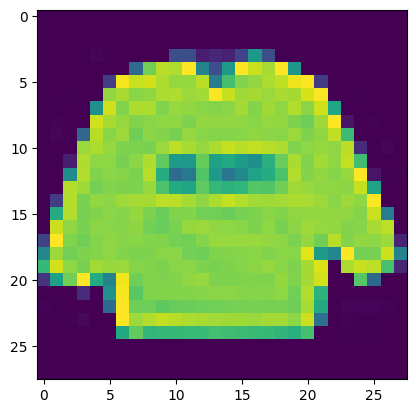

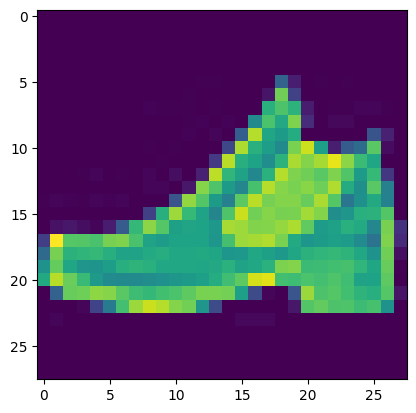

In [99]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[1])
plt.show()

In [130]:
model = Sequential()

In [131]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)))

In [132]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [133]:
model.add(Flatten())

In [134]:
model.add(Dense(128, activation="relu"))

In [135]:
model.add(Dense(10, activation="softmax"))

In [136]:
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer="adam")

In [137]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.fit(x_train, y_train, batch_size=28, epochs=3)

2024-04-28 01:48:09.090010: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.8226 - loss: 0.5007
Epoch 2/3
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9046 - loss: 0.2625
Epoch 3/3
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9231 - loss: 0.2072


In [139]:
loss, acc = model.evaluate(x_test, y_test, batch_size=28)

358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9123 - loss: 0.2440


In [140]:
acc

0.9178000092506409

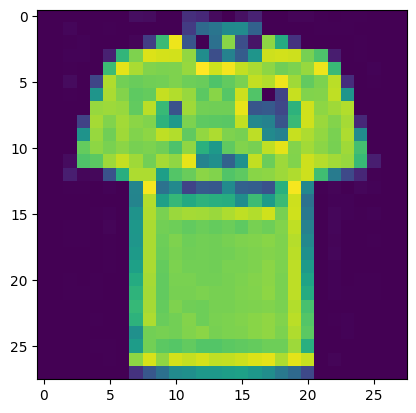

In [141]:
plt.imshow(x_test[0])

In [143]:
a = model.predict(x_test[2:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [144]:
import numpy as np

In [145]:
a.shape

(1, 10)

In [146]:
np.argmax(a)

2